In [4]:
import pandas as pd

df = pd.read_csv("/kaggle/input/walmart-sales/Walmart_Sales.csv")  # change to your actual dataset name
print("Column Names:", df.columns.tolist())
print("\nData Types:")
print(df.dtypes)
print("\nFirst 5 rows:")
print(df.head())


Column Names: ['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

Data Types:
Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

First 5 rows:
   Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106  


Dataset Preview:
   Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106  


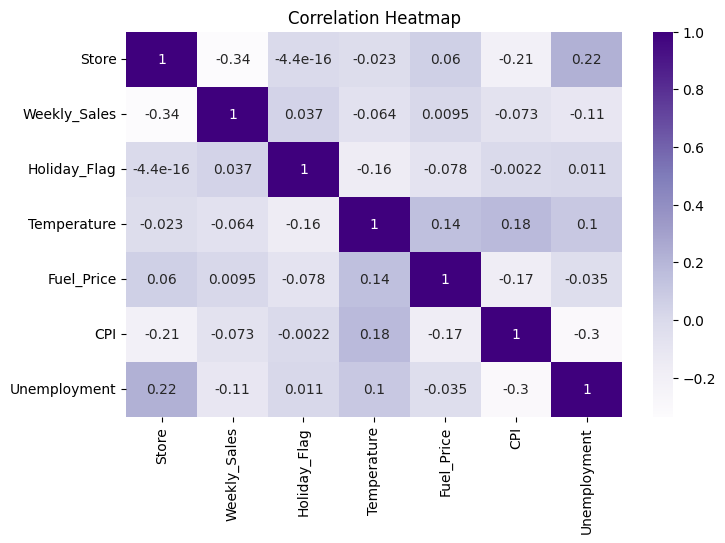


Model Evaluation:
Mean Absolute Error: 433274.8811147915
Mean Squared Error: 274455221280.66055
R2 Score: 0.14806353405950778

Sample Comparison:
      Actual Sales  Predicted Sales
2436    1138800.32     1.196175e+06
3361    1304850.67     1.096307e+06
233     1769296.25     1.261763e+06
3667    1077640.13     1.102194e+06
5011     428851.99     7.467432e+05


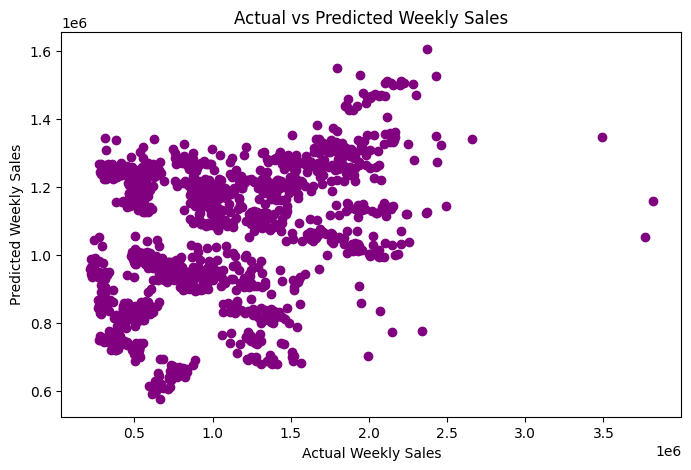


Predicted Weekly Sales for input [[  1.    0.   40.    2.5 210.    8. ]]: ₹1303896.37


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [5]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Step 1: Load dataset
df = pd.read_csv("/kaggle/input/walmart-sales/Walmart_Sales.csv")  # replace with your file name if different

# Step 2: Display first few rows
print("Dataset Preview:")
print(df.head())

# Step 3: Handle missing values (if any)
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

# Step 4: Drop non-numeric column (Date)
df = df.drop(columns=['Date'])

# Step 5: Visualize correlations
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(), annot=True, cmap="Purples")
plt.title("Correlation Heatmap")
plt.show()

# Step 6: Prepare features (X) and target (y)
X = df[['Store', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']]
y = df['Weekly_Sales']

# Step 7: Split data into training & testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 8: Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 9: Make predictions
y_pred = model.predict(X_test)

# Step 10: Evaluate the model
print("\nModel Evaluation:")
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

# Step 11: Compare actual vs predicted
comparison = pd.DataFrame({'Actual Sales': y_test, 'Predicted Sales': y_pred})
print("\nSample Comparison:")
print(comparison.head())

# Step 12: Visualization - Actual vs Predicted
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, color='purple')
plt.xlabel("Actual Weekly Sales")
plt.ylabel("Predicted Weekly Sales")
plt.title("Actual vs Predicted Weekly Sales")
plt.show()

# Step 13: Example prediction
example = np.array([[1, 0, 40.0, 2.5, 210.0, 8.0]])  # [Store, Holiday_Flag, Temp, Fuel, CPI, Unemployment]
predicted_sales = model.predict(example)
print(f"\nPredicted Weekly Sales for input {example}: ₹{predicted_sales[0]:.2f}")
